# Proyecto Final
# Juan Andrés Rozo, Jeffrey Ramírez

Descripción del problema, justificación y objetivos:

En este proyecto se busca crear y optimizar un portafolio de inversión mediante el uso de técnicas probabilísticas y de optimización. La construcción de portafolios aleatorios y la optimización probabilística permiten encontrar la combinación de activos que maximiza el rendimiento esperado, dado un nivel de riesgo determinado.

El problema de construir un portafolio óptimo consiste en encontrar la combinación de activos financieros que maximice la rentabilidad esperada del portafolio, dada una cierta cantidad de riesgo asumido. La rentabilidad de un activo se puede medir por el retorno que genera (por ejemplo, la ganancia o pérdida en el precio de una acción o el pago de dividendos), mientras que el riesgo se puede medir por la volatilidad o la desviación estándar de los retornos.

Justificación y objetivos

La construcción aleatoria y optimización probabilística de portafolios es un tema importante en la gestión de inversiones y la planificación financiera. La creación de un portafolio óptimo permite a los inversores maximizar su rentabilidad esperada mientras se controla el nivel de riesgo. Además, la construcción de un portafolio diversificado es esencial para minimizar el riesgo sistemático y no sistemático de los activos individuales.

La importancia de construir un portafolio adecuado radica en la necesidad de maximizar las ganancias y minimizar las pérdidas al invertir en el mercado financiero. La creación de un portafolio diversificado permite reducir el riesgo, ya que el rendimiento de cada activo no se correlaciona perfectamente con el de los demás activos.

El objetivo principal de la construcción de un portafolio es diversificar el riesgo, es decir, combinar activos financieros que no estén altamente correlacionados para reducir el riesgo total del portafolio. Esto se debe a que una disminución en el valor de un activo se puede compensar con un aumento en el valor de otro activo, lo que reduce la variabilidad del rendimiento total del portafolio.

Los objetivos específicos de este proyecto son los siguientes: Recopilar y limpiar los datos financieros necesarios para la construcción del portafolio. Realizar un análisis descriptivo de los datos para identificar patrones y tendencias. Aplicar técnicas de optimización y regresión para encontrar el mejor portafolio posible. Evaluar el rendimiento del portafolio a través de simulaciones de Monte Carlo y procesos estocásticos.

Implementación del modelo y análisis de resultados:

En primer lugar, se debe construir el modelo de portafolio óptimo utilizando el método Michaud y la librería CVXPY. Este modelo debe tener en cuenta las preferencias del inversor, la matriz de covarianza estocástica y otros factores relevantes que puedan afectar los retornos de los activos. Una vez que se ha construido el modelo de portafolio óptimo, se puede utilizar la simulación de Monte Carlo para evaluar su rendimiento y riesgo en diferentes escenarios de mercado.se deben definir un conjunto de variables aleatorias que representen los escenarios de mercado. Estas variables aleatorias pueden representar, por ejemplo, la tasa de crecimiento del PIB, la inflación, las tasas de interés y otros factores relevantes que puedan afectar los retornos de los activos.

Calcular las estadísticas descriptivas de los retornos del portafolio óptimo para cada escenario de mercado generado en el paso 2. Estas estadísticas pueden incluir la media, la desviación estándar, el VaR (valor en riesgo), el CVaR (valor en riesgo condicional) y otros indicadores de riesgo y rendimiento.

Analizar los resultados de la simulación de Monte Carlo para evaluar el rendimiento y el riesgo del portafolio óptimo en diferentes escenarios de mercado.

En resumen, la simulación de Monte Carlo y los procesos estocásticos son herramientas útiles para la evaluación del riesgo y el rendimiento de los portafolios de inversión. Al combinar estas técnicas con el método Michaud y la librería CVXPY, se puede construir un modelo de portafolio óptimo que tenga en cuenta las preferencias del inversor y otros factores relevantes que puedan afectar los retornos de los activos. La simulación de Monte Carlo permite entonces evaluar el rendimiento y el riesgo del portafolio óptimo en diferentes escenarios de mercado

In [ ]:
%pip install cvxpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
from scipy import stats
from scipy.stats import norm
#!pip install --quiet yfinance
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
activos = ["CSCO","JNJ","MCD"] 
precios = yf.download(activos, start="2017-12-01",end="2022-12-31",interval="1Mo")['Adj Close']
retornos = np.log(precios/precios.shift()).dropna()
promedio_rendimientos = retornos.mean()
covarianza = retornos.cov()
sigma = retornos.std()
cov = retornos.cov()

[*********************100%***********************]  3 of 3 completed


In [ ]:
import cvxpy as cp 
w= cp.Variable(3)
obj=cp.Minimize(cp.quad_form(w,covarianza))
const = [cp.sum(w)==1, w>=0]
prob = cp.Problem(obj, const)
prob.solve()
wpmvg = w.value
wpmvg

array([0.09784298, 0.51628811, 0.38586891])

In [ ]:
alpha=0.95
VaR= norm.ppf(alpha, promedio_rendimientos,sigma) 
VaR

array([0.13486207, 0.09029838, 0.10001104])

In [ ]:
def PathsOU(X0, k, mu, sigma, T, NS, M):
    Z = np.random.normal(0,1,[NS,M])
    dt = T / M
    X = np.zeros([NS, M+1])
    X[:,0] = X0
    for t in range(0,M):
        X[:,t+1] = X[:,t] + k*(mu - X[:,t]) * dt + sigma * np.sqrt(dt) * Z[:,t]
    return X


In [ ]:
T = 4       # Para 4 años
M = 48      # número de meses en 5 años, dado que la simulación es mensual
k = 1
mu = promedio_rendimientos 
sigma = sigma
X0 = precios.iloc[-1,:]
NS = 3


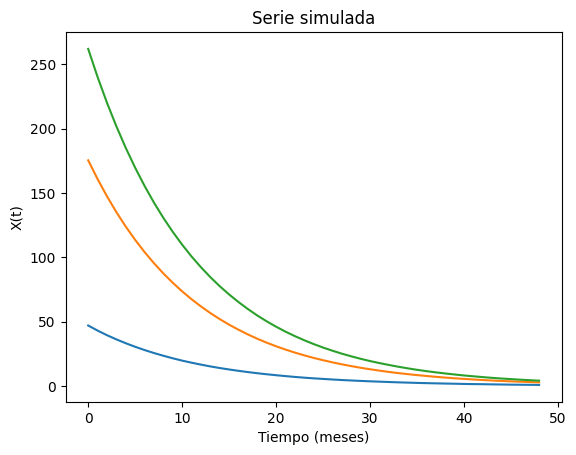

In [ ]:
plt.plot(np.transpose(PathsOU(X0, k, mu, sigma, T, NS, M)));
plt.xlabel("Tiempo (meses)")
plt.title("Serie simulada")
plt.ylabel("X(t)")
plt.show();

In [ ]:
X=PathsOU(X0, k, mu, sigma, T, NS, M)


In [ ]:
X = pd.DataFrame(X.T)


In [ ]:
retornos_simulados = np.log(X/X.shift()).dropna()
Mu_simulados = retornos_simulados.mean()
covarianza_simulados = retornos_simulados.cov()
sigma_simulados = retornos_simulados.std()


In [ ]:
import cvxpy as cp 
w_simulado= cp.Variable(3)
obj=cp.Minimize(cp.quad_form(w_simulado,covarianza_simulados))
const = [cp.sum(w_simulado)==1, w_simulado>=0]
prob = cp.Problem(obj, const)
prob.solve()
wpmvg_simulado = w_simulado.value
wpmvg_simulado


array([4.52666980e-16, 5.27140193e-01, 4.72859807e-01])

In [ ]:
alpha=0.95
VaR_simulado= norm.ppf(alpha, Mu_simulados,sigma_simulados) 
VaR_simulado

array([-0.07306644, -0.08402833, -0.08436438])

In [ ]:

resumen = np.array([wpmvg.round(4), wpmvg_simulado.round(4), VaR.round(4), VaR_simulado.round(4)])
resumen

array([[ 0.0978,  0.5163,  0.3859],
       [ 0.    ,  0.5271,  0.4729],
       [ 0.1349,  0.0903,  0.1   ],
       [-0.0731, -0.084 , -0.0844]])